# Lesson 10 (or Milestone NUMBER)
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

In [1]:
!pip install tensorflow

     |████████████████████████████████| 516.2 MB 8.9 kB/s eta 0:00:014    |█                               | 16.0 MB 12.7 MB/s eta 0:00:40     |█                               | 16.8 MB 12.7 MB/s eta 0:00:40     |█                               | 17.5 MB 12.7 MB/s eta 0:00:40     |█▏                              | 18.9 MB 12.7 MB/s eta 0:00:40     |█▏                              | 19.5 MB 12.7 MB/s eta 0:00:39     |███                             | 47.7 MB 13.2 MB/s eta 0:00:36     |███▏                            | 51.3 MB 13.2 MB/s eta 0:00:36     |███▏                            | 51.8 MB 13.2 MB/s eta 0:00:36     |████▊                           | 75.9 MB 5.9 MB/s eta 0:01:15     |█████▏                          | 83.2 MB 6.4 MB/s eta 0:01:08     |███████▋                        | 122.1 MB 10.9 MB/s eta 0:00:37     |████████▎                       | 133.0 MB 12.3 MB/s eta 0:00:32     |████████▋                       | 138.7 MB 11.9 MB/s eta 0:00:32
     |██████████████████████████

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

plt.rc('font', size=14) 

def decode_wire(wire, lookup):
    return ' '.join([lookup[i] for i in wire])

## Step 1: Read & Explore Reuters dataset

In [84]:
max_features = 10000

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=max_features)
print('Loaded...')

Loaded...


In [21]:
words = tf.keras.datasets.reuters.get_word_index(path="reuters_word_index.json")
word_lookup = {value: key for key, value in words.items()}
print('Loaded...')

Loaded...


In [22]:
print("Training data dimensions: {}".format(X_train.shape))
print("Test data dimensions: {}".format(X_test.shape))

Training data dimensions: (8982,)
Test data dimensions: (2246,)


In [32]:
print(X_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [30]:
decode_wire(X_train[0], word_lookup)

'the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [41]:
for i in range(10):
    print(f"For index {i+1} the word is \"{word_lookup[i+1]}\".")

For index 1 the word is "the".
For index 2 the word is "of".
For index 3 the word is "to".
For index 4 the word is "in".
For index 5 the word is "said".
For index 6 the word is "and".
For index 7 the word is "a".
For index 8 the word is "mln".
For index 9 the word is "3".
For index 10 the word is "for".


## Step 2: Prepare

#### Pad Wires

We need to pad the wires, but where do we cut it off. Let's explore.

Text(0.5, 1.0, 'Length of Wires')

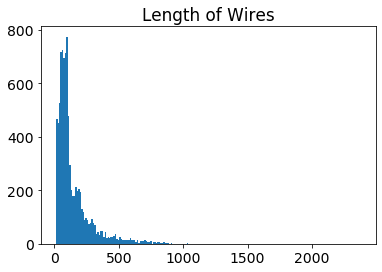

In [56]:
wire_lens = np.array([len(i) for i in X_train])
_ = plt.hist(wire_lens, bins='auto')
plt.title("Length of Wires")

In [57]:
np.median(wire_lens)

95.0

In [58]:
np.max(wire_lens)

2376

In [85]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_wire_length = 300
X_train_padded = pad_sequences(X_train, maxlen = max_wire_length)
X_test_padded = pad_sequences(X_test, maxlen = max_wire_length)

print('Done Padding...')

Done Padding...


In [86]:
print(X_train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

#### Encode Target

In [87]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

print('Done Encoding...')

Done Encoding...


## Step 3: Build Models

#### Model 1

In [104]:
model_one = keras.models.Sequential()
model_one.add(keras.layers.Embedding(max_features, 64, input_length = max_wire_length))
model_one.add(keras.layers.LSTM(32))
model_one.add(keras.layers.Dense(46, activation = 'softmax'))
model_one.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model_one.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 64)           640000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_12 (Dense)             (None, 46)                1518      
Total params: 653,934
Trainable params: 653,934
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
model_one.fit(X_train_padded, one_hot_train_labels, validation_data = (X_test_padded, one_hot_test_labels), epochs = 2, batch_size = 128)

Epoch 1/2
71/71 [==============================] - 11s 154ms/step - loss: 3.0010 - accuracy: 0.3354 - val_loss: 2.4540 - val_accuracy: 0.3620
Epoch 2/2
71/71 [==============================] - 10s 147ms/step - loss: 2.3766 - accuracy: 0.3517 - val_loss: 2.2855 - val_accuracy: 0.3620


In [106]:
# Evaluate model
scores = model_one.evaluate(X_test_padded, one_hot_test_labels)
print("Accuracy: {:.2f}%".format(scores[1]*100))

71/71 [==============================] - 2s 23ms/step - loss: 2.2855 - accuracy: 0.3620
Accuracy: 36.20%


#### Model 2 - Increase Epochs from 2 to 5

In [110]:
model_two = keras.models.Sequential()
model_two.add(keras.layers.Embedding(max_features, 64, input_length = max_wire_length))
model_two.add(keras.layers.LSTM(32))
model_two.add(keras.layers.Dense(46, activation = 'softmax'))
model_two.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model_two.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 64)           640000    
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_14 (Dense)             (None, 46)                1518      
Total params: 653,934
Trainable params: 653,934
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
model_two.fit(X_train_padded, one_hot_train_labels, validation_data = (X_test_padded, one_hot_test_labels), epochs = 5, batch_size = 128)

Epoch 1/5
71/71 [==============================] - 11s 155ms/step - loss: 2.9924 - accuracy: 0.3369 - val_loss: 2.4099 - val_accuracy: 0.3620
Epoch 2/5
71/71 [==============================] - 11s 154ms/step - loss: 2.1928 - accuracy: 0.4316 - val_loss: 2.0730 - val_accuracy: 0.4711
Epoch 3/5
71/71 [==============================] - 12s 165ms/step - loss: 1.9129 - accuracy: 0.5045 - val_loss: 1.8044 - val_accuracy: 0.5307
Epoch 4/5
71/71 [==============================] - 12s 166ms/step - loss: 1.7287 - accuracy: 0.5587 - val_loss: 1.7393 - val_accuracy: 0.5646
Epoch 5/5
71/71 [==============================] - 11s 155ms/step - loss: 1.6053 - accuracy: 0.5871 - val_loss: 1.7106 - val_accuracy: 0.5614


In [112]:
scores = model_two.evaluate(X_test_padded, one_hot_test_labels)
print("Accuracy: {:.2f}%".format(scores[1]*100))

71/71 [==============================] - 2s 22ms/step - loss: 1.7106 - accuracy: 0.5614
Accuracy: 56.14%


#### Model 3 -

In [121]:
model_three = keras.models.Sequential()
model_three.add(keras.layers.Embedding(max_features, 64, input_length = max_wire_length))
model_three.add(keras.layers.SimpleRNN(64, return_sequences=True))
model_three.add(keras.layers.SimpleRNN(64, return_sequences=True))
model_three.add(keras.layers.SimpleRNN(64, return_sequences=True))
model_three.add(keras.layers.LSTM(64))
model_three.add(keras.layers.Dense(46, activation = 'softmax'))
model_three.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model_three.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 46)                23598     
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________
None


In [122]:
model_three.fit(X_train_padded, one_hot_train_labels, validation_data = (X_test_padded, one_hot_test_labels), epochs = 5, batch_size = 128)

Epoch 1/5


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_23 is incompatible with the layer: expected axis -1 of input shape to have value 10000 but received input with shape [None, 300]


In [115]:
scores = model_three.evaluate(X_test_padded, one_hot_test_labels)
print("Accuracy: {:.2f}%".format(scores[1]*100))

71/71 [==============================] - 6s 82ms/step - loss: 2.0383 - accuracy: 0.4622
Accuracy: 46.22%


## Step 4: Describe & Explain Your Findings

Overall Model 2 had the highest accuracy of 56%. I would have liked try more networks, but I kept getting "layer incompatibility errors" that I wasn't sure how to address. Hopefully I'll learn more about this stuff in future courses and books.